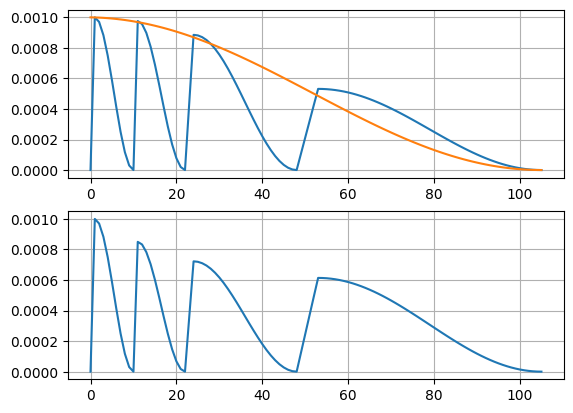

In [1]:
import torchvision.models as models
import torch.nn as nn
import torch
from utils import *
import matplotlib.pyplot as plt

model = models.vgg19_bn(weights="DEFAULT")
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
a = cosine_cycle_anneal_lr(max_epoch=100, first_period=10, period_factor=1.2, warm_up_ratio=0.1, lr_min=1e-6, lr_max=1e-3, lr_max_decay="cosine")
b = cosine_cycle_anneal_lr(max_epoch=100, first_period=10, period_factor=1.2, warm_up_ratio=0.1, lr_min=1e-6, lr_max=1e-3, lr_max_decay=0.85)


lr = []
lr2 = []
lr3=[]
for i in range(106):
    #opt =  warn_up_cosine_lr(
    #        num_epoch=i,
    #        warm_up_ratio=0.05,
    #        optimizer=opt,
    #        max_epoch=100,
    #        lr_min=1e-5,
    #        lr_max=1e-3
    #    )
    opt = a.step(i, opt)
    lr.append(opt.param_groups[0]['lr'])
    opt = warn_up_cosine_lr(
                start_epoch = 0,
                num_epoch=i+1,
                warm_up_ratio=0,
                optimizer=opt,
                max_epoch=106,
                lr_max=1e-3,
                lr_min=1e-6
            )
    lr3.append(opt.param_groups[0]['lr'])
        
    #opt.step()
    #sec.step()

for i in range(106):
    #opt =  warn_up_cosine_lr(
    #        num_epoch=i,
    #        warm_up_ratio=0.05,
    #        optimizer=opt,
    #        max_epoch=100,
    #        lr_min=1e-5,
    #        lr_max=1e-3
    #    )
    opt = b.step(i, opt)
    lr2.append(opt.param_groups[0]['lr'])
    #opt.step()
    #sec.step()

fig, axe = plt.subplots(2, 1) 

axe[0].plot(lr)
axe[0].plot(lr3)
axe[0].grid(True)

axe[1].plot(lr2)
axe[1].grid(True)
plt.show()


In [ ]:
import torch
import torch.nn.functional as F

data = torch.randn(5, 2)

print(data)

print(F.softmax(data, dim=1))

target = torch.LongTensor([0, 1, 0, 1, 1])
target_one_hot = torch.zeros_like(data)
for i in range(5):
    target_one_hot[i, target[i]] = 1

print(target_one_hot)

tensor([[-0.3871, -0.8099],
        [ 1.0027,  1.4742],
        [-0.1874,  0.5506],
        [-1.1381,  1.1522],
        [ 0.5165, -0.6218]])
tensor([[0.6042, 0.3958],
        [0.3843, 0.6157],
        [0.3234, 0.6766],
        [0.0919, 0.9081],
        [0.7574, 0.2426]])
tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])


In [2]:
from Dataset import *

a = EDFdataset(dataset_folder_path="./EEGDataset/chb03/", mode="valid")

print(a.__getitem__(0))

|■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■| 1/ 1 edf file processed.
(tensor([[[-2.3819, -1.0012, -1.0012,  ..., -1.6504, -1.5955, -1.6412],
         [-0.5357, -1.0037, -1.0037,  ...,  0.7587,  0.7786,  0.9180],
         [ 0.0449, -0.9955, -0.9955,  ..., -1.3324, -1.5206, -1.4711],
         ...,
         [-1.7316, -1.0001, -1.0001,  ...,  0.2319,  0.2960,  0.3474],
         [-0.6866, -1.0022, -1.0022,  ..., -1.5071, -1.3493, -0.8129],
         [-0.1818, -0.9955, -0.9955,  ..., -1.3880, -1.8188, -1.3019]]]), 0)
